In [ ]:
# If you get ModuleNotFoundError, run this cell:
!pip install pandas matplotlib seaborn

##### sales analysis
##### customer preferences
##### predicting order quantity using linear regression
##### KNN algorithm for customer segments based on orders

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
file_path = './chipotle.csv'
tacobell_data = pd.read_csv(file_path,delimiter='\t')
tacobell_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [22]:
tacobell_data.isna().sum()


order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [ ]:
# Convert 'item_price' to numerical format

tacobell_data['item_price'] = tacobell_data['item_price'].str.replace('$',"").astype(float)
tacobell_data['choice_description'].fillna('None', inplace=True)



In [24]:
sales_analysis = tacobell_data.groupby('item_name').agg(
    Total_Order = pd.NamedAgg(column='quantity', aggfunc='sum'),
    Total_Sales = pd.NamedAgg(column='item_price', aggfunc='sum')
).reset_index().sort_values(by='Total_Sales', ascending=False)

sales_analysis.head()

,item_name,Total_Order,Total_Sales
17,Chicken Bowl,761,7342.73
18,Chicken Burrito,591,5575.82
39,Steak Burrito,386,3851.43
38,Steak Bowl,221,2260.19
25,Chips and Guacamole,506,2201.04


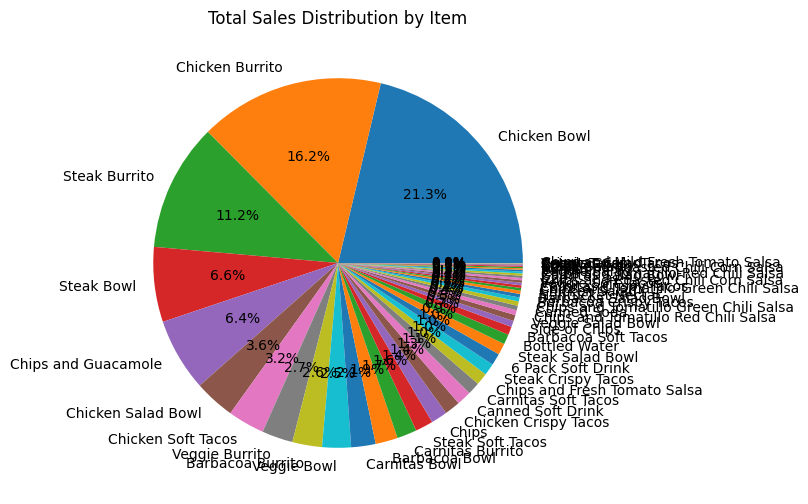

In [25]:
plt.figure(figsize=(12,6))
plt.pie(sales_analysis['Total_Sales'], labels=sales_analysis['item_name'], autopct='%1.1f%%')
plt.title('Total Sales Distribution by Item')
plt.show()

In [26]:
# Analyze the choice_description for popular items

popular_items = sales_analysis.head(5)['item_name']
tacobell_data[tacobell_data['item_name'].isin(popular_items)].groupby('item_name')['choice_description'].value_counts().head(10)

item_name     choice_description                                                               
Chicken Bowl  [Fresh Tomato Salsa, [Fajita Vegetables, Rice]]                                      17
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]    14
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]               14
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]                                    13
              [Fresh Tomato Salsa, [Rice, Cheese, Lettuce]]                                        13
              [Fresh Tomato Salsa, [Rice, Cheese, Sour Cream, Lettuce]]                            13
              [Tomatillo Green Chili Salsa, [Rice, Pinto Beans, Sour Cream, Lettuce]]              12
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]                        11
              [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Lettuce]]                  

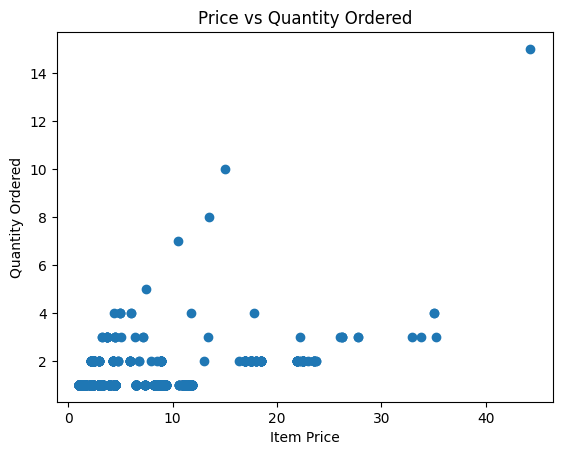

In [27]:
# Analyze the relationship between item price and order quantity
plt.scatter(tacobell_data['item_price'], tacobell_data['quantity'])
plt.xlabel('Item Price')
plt.ylabel('Quantity Ordered')
plt.title('Price vs Quantity Ordered')
plt.show()


In [ ]:

!pip install scikit-learn


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

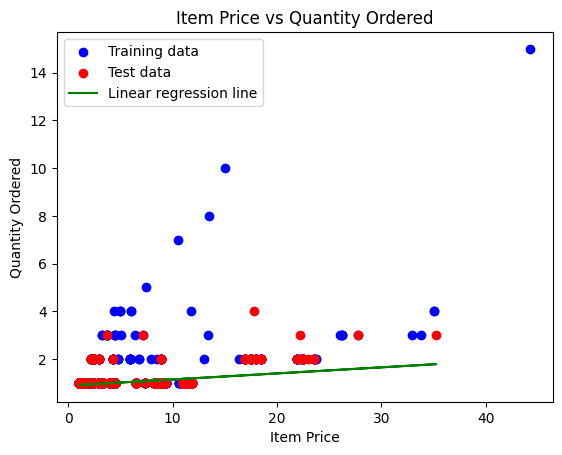

In [32]:
order_data = tacobell_data[['item_price']]
order_quantity = tacobell_data['quantity']

lin_reg = LinearRegression()
lin_reg.fit(order_data, order_quantity)

X_train, X_test, y_train, y_test = train_test_split(order_data, order_quantity, test_size=0.2, random_state=42)

y_pred = lin_reg.predict(X_test)


plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_test, y_pred, color='green', label='Linear regression line')
plt.xlabel('Item Price')
plt.ylabel('Quantity Ordered')
plt.title('Item Price vs Quantity Ordered')
plt.legend()
plt.show()

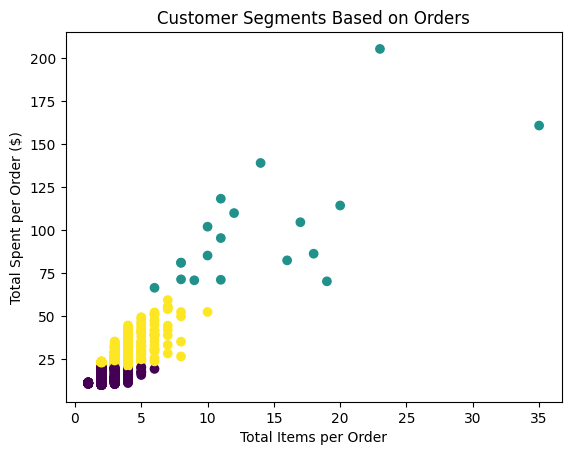

In [33]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

order_data = tacobell_data.groupby('order_id').agg(
    Total_Items=pd.NamedAgg(column='quantity', aggfunc='sum'),
    Total_Spent=pd.NamedAgg(column='item_price', aggfunc='sum')
).reset_index()

kmeans = KMeans(n_clusters=3)
order_segments = kmeans.fit_predict(order_data[['Total_Items', 'Total_Spent']])

plt.scatter(order_data['Total_Items'], order_data['Total_Spent'], c=order_segments, cmap='viridis')
plt.xlabel('Total Items per Order')
plt.ylabel('Total Spent per Order ($)')
plt.title('Customer Segments Based on Orders')
plt.show()